# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


### 데이터 분할

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
y.value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

In [8]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
21565,-0.674514,0.281555,0.758431,1.122540,0.607640,-0.465281,1.192957,-0.434342,0.668186,0.676205,...,0.694552,0.242112,0.011836,0.800800,-0.063469,-0.041410,-0.106374,-0.379502,0.270199,-0.104630
13766,-3.131214,1.250548,-1.088116,-0.948595,-0.823408,0.921434,0.301721,-0.204495,1.794236,1.821876,...,0.098904,-0.951349,0.319050,1.026175,-0.017698,0.182325,-0.801046,0.198368,-2.863783,0.007223
10643,1.364625,-0.849058,0.360596,-0.524372,-1.196476,-0.523307,-0.778607,0.030202,0.015735,0.533685,...,1.136559,-0.033862,-0.131643,-0.476452,-0.026151,-0.166936,0.416095,-0.296530,-0.000416,0.011999
2438,2.061884,-0.124741,-1.082271,0.428401,-0.241999,-1.244387,0.112626,-0.275503,0.700787,0.104521,...,0.150053,-0.293348,-0.301122,-0.783618,0.354431,0.017388,-0.335099,0.198973,-0.077525,-0.062201
15165,0.204501,1.204666,-1.027833,-0.009798,0.369043,-1.391748,0.561628,0.120488,-0.190830,-1.171245,...,-0.338041,-0.252699,0.325452,0.972732,-0.108524,-0.085192,-0.280997,-0.147171,-0.059902,-0.045166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,1.270318,-1.707345,-0.517895,0.460701,-1.033592,0.431882,-0.435072,0.178149,1.543009,-0.365042,...,0.541477,0.502701,0.017795,-0.450862,0.069201,0.780188,-0.549620,-0.298775,-0.042146,0.020260
15225,1.114628,-0.268009,0.075601,-0.101939,-0.557054,-0.946576,0.184338,-0.205876,-0.042323,-0.114776,...,0.604592,0.105534,0.012046,-0.010007,-0.126369,0.663380,0.392717,1.431752,-0.138019,-0.007271
5633,-0.610707,-0.190561,0.577476,-1.263107,0.440735,0.443762,0.868664,0.170315,-0.048755,-0.861975,...,-0.250872,0.311347,-0.001759,-0.401651,0.572887,0.063934,-1.070858,-0.014997,0.090038,0.229487
13181,1.173508,0.501621,-0.523316,1.123965,0.346570,-0.299239,0.015656,0.152270,-0.089320,-0.509311,...,-0.559702,-0.210670,-0.028419,-0.086821,-0.127892,-0.485459,0.577838,-0.289414,0.037012,0.037141


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 성능지표 계산

In [10]:
from sklearn.metrics import plot_confusion_matrix, recall_score, precision_score,\
                            accuracy_score, f1_score, roc_auc_score

In [11]:
y_hat = model.predict(X_test)

In [12]:
accuracy_score(y_test, y_hat)

0.997907949790795

In [13]:
f1_score(y_test, y_hat)

0.8676470588235293

In [14]:
roc_auc_score(y_test, y_hat)

0.8984727987072653

In [15]:
recall_score(y_test, y_hat)

0.7972972972972973

In [16]:
precision_score(y_test, y_hat)

0.9516129032258065

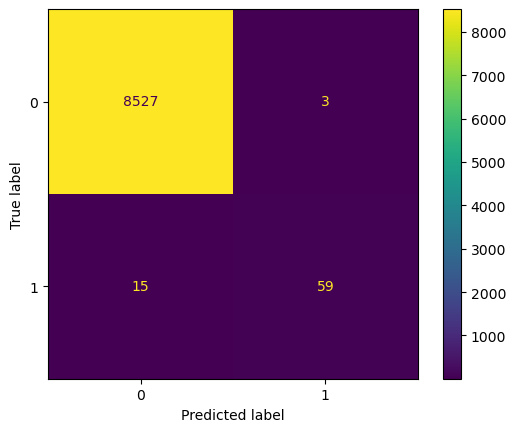

In [17]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

### 성능 개선 시도

- 예측이 틀린 것 중, False Negative가 5/6로 약 83%를 차지하므로 이를 개선하고자 한다.
  - 학습 데이터 중 대부분이 target 값이 0인 데이터 불균형 현상을 갖고 있으므로, 대부분을 0이라고 예측하면 성능이 잘나오게 학습이 된다.
  - 데이터 불균형 현상을 해결하겠다.
    - SMOTE 기법 사용
- 또한, 이상 사례를 정상 사례로 탐지하는 것은 매우 치명적이므로, Recall을 고려하는 것이 좋다.

In [18]:
from imblearn.over_sampling import SMOTE

In [23]:
sm = SMOTE(random_state=0)

X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [24]:
print(f"Before OverSampling: shape of X - {X_train.shape}, shape of y - {y_train.shape}")
print(f"After OverSampling: shape of X - {X_resampled.shape}, shape of y - {y_resampled.shape}")

Before OverSampling: shape of X - (20074, 28), shape of y - (20074,)
After OverSampling: shape of X - (39804, 28), shape of y - (39804,)


In [25]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 19902
After OverSampling, counts of label '0': 19902


In [35]:
model2 = LogisticRegression()
model2.fit(X_resampled, y_resampled)

LogisticRegression()

In [36]:
y_hat = model2.predict(X_test)

In [37]:
accuracy_score(y_test, y_hat)

0.9733844723384473

In [39]:
roc_auc_score(y_test, y_hat)

0.9463879471499637

In [40]:
recall_score(y_test, y_hat)

0.918918918918919

- Accuracy는 감소했지만, ROC-AUC와 Recall이 대폭 상승하였다.